In [1]:
import os
import cv2
import numpy as np
from decomposition.AGF_decomposition import agf_decomposition


def extract_base_images(
    folder_path,
    folder_out_path,
    start,
    end,
    sigma_spatial=5,
    sigma_range=0.05,
    iterations=4,
    median_ksize=3,
    numba=True
):
    os.makedirs(folder_out_path, exist_ok=True)

    valid_exts = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')

    # Lấy danh sách ảnh và sort
    img_list = sorted([
        f for f in os.listdir(folder_path)
        if f.lower().endswith(valid_exts)
    ])

    # Cắt theo index
    img_list = img_list[start:end]

    print(f"🔹 Processing {len(img_list)} images from index {start} to {end}")

    for fname in img_list:
        img_path = os.path.join(folder_path, fname)

        # Đọc ảnh grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Cannot read image: {fname}")
            continue

        # Chuẩn hóa về [0, 1]
        img = img.astype(np.float32) / 255.0

        # AGF decomposition
        base, _ = agf_decomposition(
            img,
            sigma_spatial=sigma_spatial,
            sigma_range=sigma_range,
            iterations=iterations,
            median_ksize=median_ksize,
            numba=numba
        )

        # Clamp + chuyển về uint8
        base = np.clip(base, 0, 1)
        base_uint8 = (base * 255).astype(np.uint8)

        # Lưu ảnh
        out_path = os.path.join(folder_out_path, fname)
        cv2.imwrite(out_path, base_uint8)

    print("✅ Done extracting base components")

folder_path = "C://Users//ADMIN//OneDrive - Hanoi University of Science and Technology//Desktop//Medical Image Fusion//MSRS//train//ir"
folder_out_path = "C://Users//ADMIN//OneDrive - Hanoi University of Science and Technology//Desktop//AGF_IVIF//data//training_model//train//ir_base"

extract_base_images(
    folder_path=folder_path,
    folder_out_path=folder_out_path,
    start=100,
    end=850
)

🔹 Processing 750 images from index 100 to 850
✅ Done extracting base components


In [3]:
import os
import cv2
import numpy as np
from decomposition.AGF_decomposition import agf_decomposition


def extract_base_images(
    folder_path,
    folder_out_path,
    start,
    end,
    sigma_spatial=5,
    sigma_range=0.05,
    iterations=4,
    median_ksize=3,
    numba=True
):
    os.makedirs(folder_out_path, exist_ok=True)

    valid_exts = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')

    # Lấy danh sách ảnh và sort
    img_list = sorted([
        f for f in os.listdir(folder_path)
        if f.lower().endswith(valid_exts)
    ])

    # Cắt theo index
    img_list = img_list[start:end]

    print(f"🔹 Processing {len(img_list)} images from index {start} to {end}")

    for fname in img_list:
        img_path = os.path.join(folder_path, fname)

        # Đọc ảnh grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Cannot read image: {fname}")
            continue

        # Chuẩn hóa về [0, 1]
        img = img.astype(np.float32) / 255.0

        # AGF decomposition
        base, _ = agf_decomposition(
            img,
            sigma_spatial=sigma_spatial,
            sigma_range=sigma_range,
            iterations=iterations,
            median_ksize=median_ksize,
            numba=numba
        )

        # Clamp + chuyển về uint8
        base = np.clip(base, 0, 1)
        base_uint8 = (base * 255).astype(np.uint8)

        # Lưu ảnh
        out_path = os.path.join(folder_out_path, fname)
        cv2.imwrite(out_path, base_uint8)

    print("✅ Done extracting base components")

folder_path = "C://Users//ADMIN//OneDrive - Hanoi University of Science and Technology//Desktop//Medical Image Fusion//MSRS//train//vi_Y"
folder_out_path = "C://Users//ADMIN//OneDrive - Hanoi University of Science and Technology//Desktop//AGF_IVIF//data//training_model//valid//vi_base"

extract_base_images(
    folder_path=folder_path,
    folder_out_path=folder_out_path,
    start=851,
    end=1082
)

🔹 Processing 231 images from index 851 to 1082
✅ Done extracting base components


#### Decomposition 

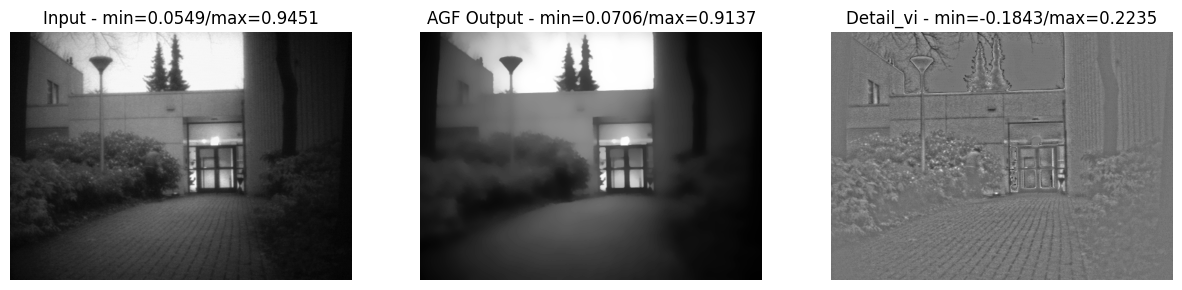

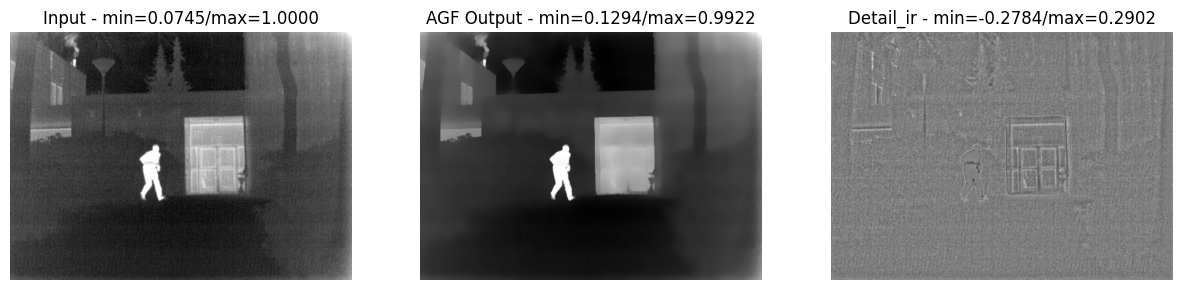

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from decomposition.AGF_decomposition import agf_decomposition

# Decompose the visible image
img_vi = cv2.imread(".\\data\\TNO\\vi\\17.png", cv2.IMREAD_GRAYSCALE)
img_vi = img_vi.astype(np.float32) / 255.0

base_vi, detail_vi = agf_decomposition(
    img_vi,
    sigma_spatial=5,
    sigma_range=0.05,
    iterations=4,
    median_ksize=3,
    numba=True
)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1); plt.title(f"Input - min={img_vi.min():.4f}/max={img_vi.max():.4f}"); plt.imshow(img_vi, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"AGF Output - min={base_vi.min():.4f}/max={base_vi.max():.4f}"); plt.imshow(base_vi, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title(f"Detail_vi - min={detail_vi.min():.4f}/max={detail_vi.max():.4f}"); plt.imshow(detail_vi, cmap="gray"); plt.axis("off")
plt.show()

# Decompose the infrared image
img_ir = cv2.imread(".\\data\\TNO\\ir\\17.png", cv2.IMREAD_GRAYSCALE)
img_ir = img_ir.astype(np.float32) / 255.0  

base_ir, detail_ir = agf_decomposition(
    img_ir,
    sigma_spatial=5,
    sigma_range=0.05,
    iterations=4,
    median_ksize=3,
    numba=True
)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1); plt.title(f"Input - min={img_ir.min():.4f}/max={img_ir.max():.4f}"); plt.imshow(img_ir, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"AGF Output - min={base_ir.min():.4f}/max={base_ir.max():.4f}"); plt.imshow(base_ir, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title(f"Detail_ir - min={detail_ir.min():.4f}/max={detail_ir.max():.4f}"); plt.imshow(detail_ir, cmap="gray"); plt.axis("off")
plt.show()

In [2]:
restruct_vi = base_vi + detail_vi
restruct_ir = base_ir + detail_ir

# Tính PSNR giữa ảnh gốc và ảnh tái cấu trúc
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

psnr_vi = psnr(img_vi, restruct_vi)
psnr_ir = psnr(img_ir, restruct_ir)
print(f"PSNR between original and reconstructed visible image: {psnr_vi:.2f} dB")
print(f"PSNR between original and reconstructed infrared image: {psnr_ir:.2f} dB")

PSNR between original and reconstructed visible image: inf dB
PSNR between original and reconstructed infrared image: inf dB


c:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\Desktop\AGF_IVIF\base_fusion\base_fused.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(

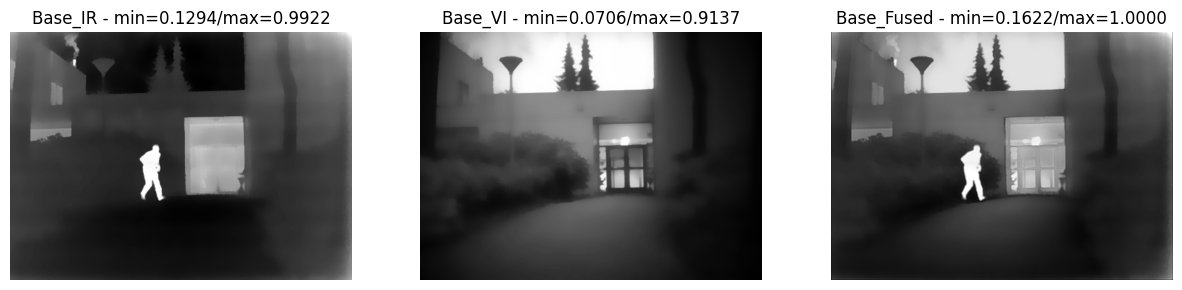

In [6]:
from base_fusion.base_fused import fuse_ir_vi_numpy

base_fused = fuse_ir_vi_numpy(
    ir_base=base_ir,
    vi_base=base_vi,
    model_path="C://Users//ADMIN//OneDrive - Hanoi University of Science and Technology//Desktop//AGF_IVIF//base_fusion//run//train_1//best_model.pth",
    device="cpu"
)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1); plt.title(f"Base_IR - min={base_ir.min():.4f}/max={base_ir.max():.4f}"); plt.imshow(base_ir, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"Base_VI - min={base_vi.min():.4f}/max={base_vi.max():.4f}"); plt.imshow(base_vi, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title(f"Base_Fused - min={base_fused.min():.4f}/max={base_fused.max():.4f}"); plt.imshow(base_fused, cmap="gray"); plt.axis("off")
plt.show()


#### Detail Fusion

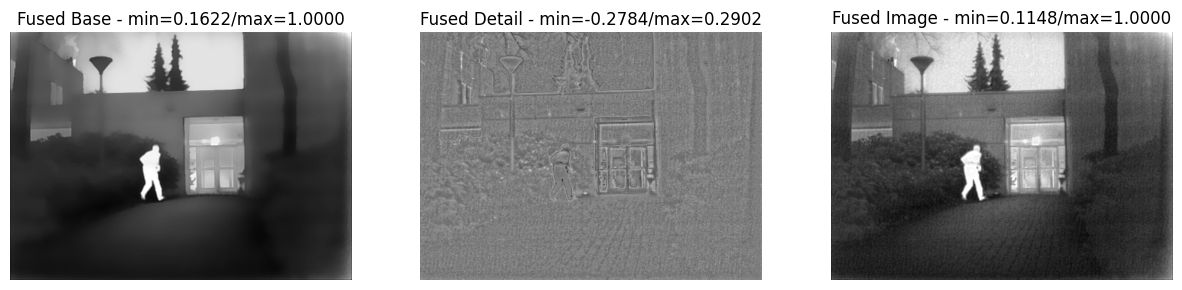

In [7]:
from detail_fusion.MVA_WLE import fuse_detail_dynamic_WLE_im2col_var_optimizer

# base_fused = np.maximum(base_vi, base_ir)
detail_fulsed = fuse_detail_dynamic_WLE_im2col_var_optimizer(detail_ir, detail_vi)
fused = np.clip(base_fused + detail_fulsed, 0, 1)

cv2.imwrite(".\\data\\output\\AGF_fusion_base.png", (fused * 255).astype(np.uint8))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.title(f"Fused Base - min={base_fused.min():.4f}/max={base_fused.max():.4f}"); plt.imshow(base_fused, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title(f"Fused Detail - min={detail_fulsed.min():.4f}/max={detail_fulsed.max():.4f}"); plt.imshow(detail_fulsed, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title(f"Fused Image - min={fused.min():.4f}/max={fused.max():.4f}"); plt.imshow(fused, cmap="gray"); plt.axis("off")
plt.show()

In [8]:
import pandas as pd
from metric.eval_one_image import evaluation_one

ir_image = ".\\data\\TNO\\ir\\17.png"
vi_image = ".\\data\\TNO\\vi\\17.png"
fused_image = ".\\data\\output\\AGF_fusion_base.png"

EN, MI, SF, AG, SD, MLI, CC, SCD, VIF, MSE, PSNR, Qabf, Nabf, SSIM, MS_SSIM = evaluation_one(ir_image, vi_image, fused_image)

# Tạo bảng kết quả
data = {
    "Metric": [
        "EN", "MI", "SF", "AG", "SD", "MLI", "CC", "SCD",
        "VIF", "MSE", "PSNR", "Qabf", "Nabf", "SSIM", "MS_SSIM"
    ],
    "Value": [
        EN, MI, SF, AG, SD, MLI, CC, SCD,
        VIF, MSE, PSNR, Qabf, Nabf, SSIM, MS_SSIM
    ]
}

df = pd.DataFrame(data)

# Làm tròn cho đẹp (tuỳ chọn)
df["Value"] = df["Value"].round(6)

# Hiển thị bảng
print(df)


torch.Size([1, 1, 1, 450, 620]) torch.Size([1, 1, 1, 450, 620])
torch.Size([1, 1, 1, 450, 620]) torch.Size([1, 1, 1, 450, 620])
     Metric       Value
0        EN    7.180696
1        MI    2.933654
2        SF    9.350508
3        AG    3.869501
4        SD   51.962393
5       MLI  107.027382
6        CC    0.561747
7       SCD    1.763188
8       VIF    0.714653
9       MSE    0.041737
10     PSNR   61.925565
11     Qabf    0.569586
12     Nabf    0.030506
13     SSIM    0.470706
14  MS_SSIM    0.489627


#### Base Fusion

In [ ]:
import torch
import cv2
import numpy as np
from base_fusion.loss.loss import fusion_loss_vif

def load_gray_image(path, device):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Cannot load image: {path}")

    img = img.astype(np.float32) / 255.0
    img = torch.from_numpy(img).unsqueeze(0).unsqueeze(0)  # [1,1,H,W]
    return img.to(device)


def compute_fusion_loss(image1_path, image2_path, image_fused_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load images
    image_A = load_gray_image(image1_path, device)
    image_B = load_gray_image(image2_path, device)
    image_F = load_gray_image(image_fused_path, device)

    # Init loss
    criterion = fusion_loss_vif().to(device)

    # Compute loss
    fusion_loss, loss_grad, loss_l1, loss_ssim = criterion(
        image_A, image_B, image_F
    )

    return {
        "fusion_loss": fusion_loss.item(),
        "loss_gradient": loss_grad.item(),
        "loss_intensity": loss_l1.item(),
        "loss_ssim": loss_ssim.item(),
        "device": str(device)
    }


if __name__ == "__main__":
    image1_path = ".\\data\\TNO\\ir\\17.png"
    image2_path = ".\\data\\TNO\\vi\\17.png"
    image_fused_path = ".\\data\\output\\AGF_fusion_base.png"

    loss_dict = compute_fusion_loss(
        image1_path, image2_path, image_fused_path
    )

    for k, v in loss_dict.items():
        print(f"{k}: {v}")


fusion_loss: 3.6317129135131836
loss_gradient: 0.7227263450622559
loss_intensity: 0.16194561123847961
loss_ssim: 2.7470409870147705
device: cpu
